# Perceptron Binary Classification:
## Cross Validation (misterious data)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("misterious_data.txt")
X = data[:, 1:]
y = np.where(data[:, 0] == 2, 0, data[:, 0])

In [3]:
X.shape, y.shape

((528, 153), (528,))

In [4]:
from sklearn.decomposition import PCA

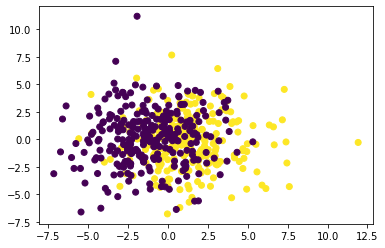

In [5]:
pca = PCA(svd_solver='full')
X_new = pca.fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.show()

In [11]:
from Perceptron import Perceptron

Naive use of testing with single random test set.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
P = Perceptron(alpha=0.00001)

In [25]:
P.fit(X_train, y_train)

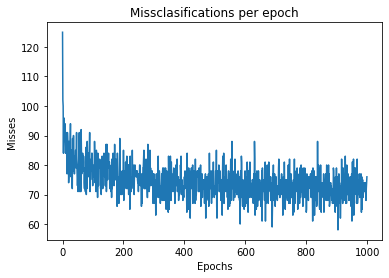

In [26]:
plt.plot(P.misses)
plt.title("Missclasifications per epoch")
plt.xlabel("Epochs")
plt.ylabel("Misses")
plt.show()

In [27]:
P.score(X_test, y_test)

AttributeError: 'Perceptron' object has no attribute 'w'